# Feature Engineering
# Klassifikation
# Regression
# Validierung und mehr
## Sampling und Resampling
### Zufallszahlen

In [2]:
## generate n uniform distribute random numbers
import numpy as np
n = 10
print(np.random.rand(n))

[0.39150427 0.59884445 0.8843327  0.67276344 0.08516285 0.92400719
 0.99597538 0.47211116 0.26941965 0.77699657]


In [3]:
## demonstrate np.random.seed()
np.random.seed(1234); print(np.random.rand(n))
np.random.seed(1234); print(np.random.rand(n))

[0.19151945 0.62210877 0.43772774 0.78535858 0.77997581 0.27259261
 0.27646426 0.80187218 0.95813935 0.87593263]
[0.19151945 0.62210877 0.43772774 0.78535858 0.77997581 0.27259261
 0.27646426 0.80187218 0.95813935 0.87593263]


C:\Users\werne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


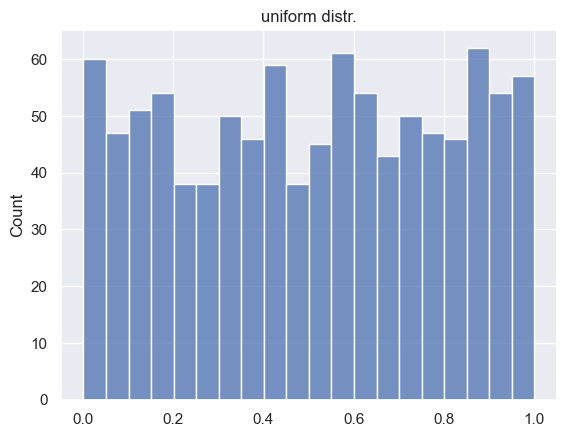

C:\Users\werne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


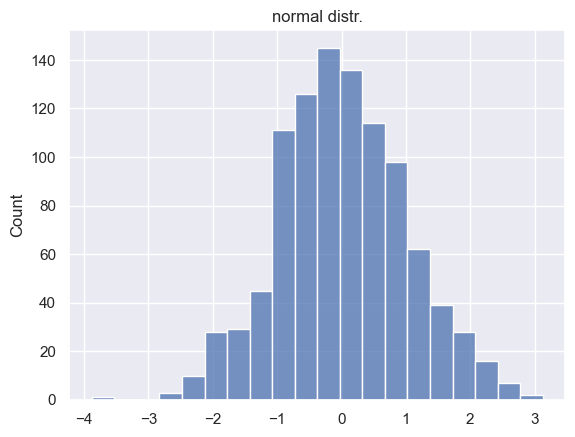

In [4]:
## important random distributions

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

x_uniform = np.random.rand(1000) ## uniform distribution
sns.histplot(x_uniform, kde=False, bins=20).set_title('uniform distr.')
plt.show()

x_norm = np.random.randn(1000) ## normal distribution
sns.histplot(x_norm, kde=False, bins=20).set_title('normal distr.')
plt.show()

### Einfaches Sampling

In [6]:
## prepare
import pandas as pd
import numpy as np
datapath = '../3_data'
from os import chdir; chdir(datapath)

#### Implementierungsmöglichkeit mit Zufallszahlen

In [8]:
## shuffle data frame
data = pd.read_csv('bank_data.csv', sep=';')

## add a random column to data frame
np.random.seed(1234) ## optional
data['rnd_col'] = np.random.rand(len(data))

## sort data frame by random column and remove random column from data frame
data = data.sort_values(by=['rnd_col'])
data.drop('rnd_col', axis=1, inplace=True)

## draw first n rows as sample
n = int(data.shape[0] * 2 / 3) ## 2/3 fraction of data frame
data_smpl = data.iloc[0:n,]

## check result
print(data_smpl.shape)
#print(data_smpl.iloc[:5,:5])

## notice row indices

## the remaining for test
data_remain = data.iloc[n:,]
print(data_remain.shape)

(6578, 21)
(3290, 21)


#### Implementierungsmöglichkeit mit einem Index

In [10]:
## read data
data = pd.read_csv('bank_data.csv', sep=';')

## define sample_size
prop = 2 / 3
smpl_size = int(len(data) * prop)

## create index range for all rows of data
idx = range(len(data))
#print(idx)

## create index for train set
np.random.seed(1234) ## optional
idx_smpl = np.random.choice(idx, smpl_size, replace=False)
#print(idx_smpl[:10])

## apply index sample for fitering
data_smpl = data.iloc[idx_smpl, ]

## apply index sample for inverse fitering
data_ramain = data.iloc[data.index.difference(idx_smpl)]

## check
print(data_smpl.shape)
print(data_remain.shape)

(6578, 21)
(3290, 21)


#### Mit der Methode `.sample()` von Pandas Data Frame

In [12]:
## load data
data = pd.read_csv('bank_data.csv', sep=';')

## sample
data_smpl = data.sample(frac=2/3, random_state=1234)
print(data_smpl.shape)

(6579, 21)


In [13]:
## shuffle
data_smpl = data.sample(frac=1)
print(data_smpl.shape)
print(data_smpl.head())

(9868, 21)
       age          job  marital          education  default housing loan  \
5702  38.0       admin.   single  university.degree       no     yes   no   
13    56.0  blue collar  married           basic.4y  unknown      no   no   
6996  43.0   management  married  university.degree       no     yes   no   
9022  41.0   technician  married  university.degree       no     yes   no   
1627  28.0   technician   single           basic.9y       no     yes   no   

        contact month day_of_week  ...  campaign  pdays  previous  poutcome  \
5702  telephone   jun         tue  ...         1    999         0       NaN   
13     cellular   jul         tue  ...         1    999         0       NaN   
6996   cellular   nov         tue  ...         4    999         0       NaN   
9022   cellular   aug         tue  ...         3    999         0       NaN   
1627   cellular   may         tue  ...         1    999         0       NaN   

     emp.var.rate  cons.price.idx  cons.conf.idx  e

In [14]:
## sample with replace=True
data_smpl = data.sample(frac=2 / 3, replace=True, random_state=1234)
print(data_smpl.index.value_counts())

5828    6
1896    6
8338    5
6761    5
7049    5
       ..
6838    1
9105    1
6318    1
8500    1
9629    1
Name: count, Length: 4857, dtype: int64


C:\Users\werne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\werne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


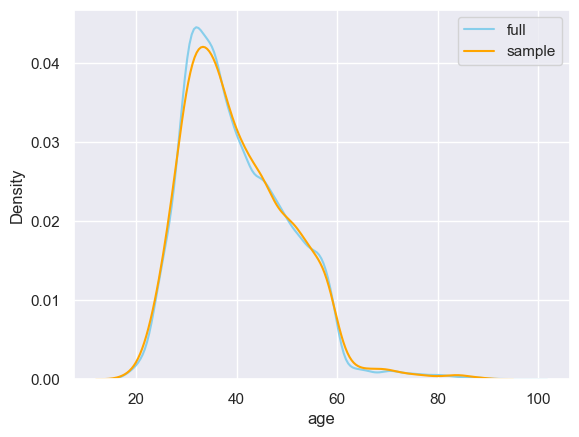

In [15]:
## expermiental comparison of population and random sample
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
bank_full_data = pd.read_csv('bank-additional-full.csv', sep=';')
frac = 0.1
bank_smpl_data = bank_full_data.sample(frac=frac, random_state=1234)

sns.kdeplot(bank_full_data['age'], color='skyblue', label='full')
sns.kdeplot(bank_smpl_data['age'], color='orange', label='sample')
plt.legend()
plt.show()

### Test - Train - Split

In [17]:
## two outputs
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, train_size=2/3, random_state=1234)

print(train.shape)
print(test.shape)

(6578, 21)
(3290, 21)


In [18]:
## four outputs (two inputs)
X = data.drop('y', axis=1)
y = data['y']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, = train_test_split(
    X, y, train_size=2/3, random_state=1234)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6578, 20)
(6578,)
(3290, 20)
(3290,)


### Geschichtetes Sampling

In [20]:
data = pd.read_csv('bank_data.csv', sep=';')
X = data.drop('y', axis=1)
y = data['y']

print(y.value_counts(normalize=True))

from sklearn.model_selection import train_test_split
X_train_str, X_test_str, y_train_str, y_test_str, = train_test_split(
    X,
    y,
    train_size=2/3,
    random_state=1234)
print(y_train_str.value_counts(normalize=True))

X_train_str, X_test_str, y_train_str, y_test_str, = train_test_split(
    X,
    y,
    train_size=2/3,
    stratify=y,        ## stratifizieren aufgrund von y
    random_state=1234)
print(y_train_str.value_counts(normalize=True))

y
no     0.529287
yes    0.470713
Name: proportion, dtype: float64
y
no     0.527364
yes    0.472636
Name: proportion, dtype: float64
y
no     0.52934
yes    0.47066
Name: proportion, dtype: float64


### Externes Sampling
#### Sequentielles Sampling

In [22]:
import numpy as np
import csv
smpl_prop = 0.1 ## proportion of pop for sample
rows = []
with open('bank-additional-full.csv', 'r') as f:
    csv_reader = csv.reader(f, delimiter=';', quoting=csv.QUOTE_NONE)
    header = next(csv_reader) ## pick header
    for row in csv_reader: ## iterate over each row after the header in the csv
        if np.random.rand() < smpl_prop: ## conditinal add row to rows
            rows.append(row)
data = pd.DataFrame(rows, columns=header) ## rows to pandas.DataFrame
print(data.shape)

(4049, 21)


#### Reservoir Sampling

In [24]:
data = pd.read_csv('bank-additional-full.csv', sep=';')

from sklearn.utils.random import sample_without_replacement
smpl = sample_without_replacement(data.shape[0], 1000, 
                                  method = 'reservoir_sampling')
smpl_data = data.iloc[smpl,:]
print(smpl_data.shape)

(1000, 21)
